In [27]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.naive_bayes import GaussianNB
from sklearn.pipeline import Pipeline
from sklearn.metrics import roc_curve, roc_auc_score, classification_report
import matplotlib.pyplot as plt
import numpy as np

In [28]:

data = load_breast_cancer()
x = data.data
y = data.target


In [29]:

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)



In [32]:
pipe = Pipeline([
    ('scaler', StandardScaler()),
    ('nb', GaussianNB())
])


In [34]:
params = {'nb__var_smoothing': np.logspace(-9, -6, 4)}
grid = GridSearchCV(pipe, params, cv=5)
grid.fit(x_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('nb', GaussianNB())]),
             param_grid={'nb__var_smoothing': array([1.e-09, 1.e-08, 1.e-07, 1.e-06])})

In [35]:

best_model = grid.best_estimator_
y_pred = best_model.predict(x_test)
y_prob = best_model.predict_proba(x_test)[:, 1]


In [36]:

print("best parameters:", grid.best_params_)
print("\nclassification report:\n", classification_report(y_test, y_pred))
print("roc auc score:", roc_auc_score(y_test, y_prob))


best parameters: {'nb__var_smoothing': np.float64(1e-09)}

classification report:
               precision    recall  f1-score   support

           0       0.92      0.90      0.91        63
           1       0.94      0.95      0.95       108

    accuracy                           0.94       171
   macro avg       0.93      0.93      0.93       171
weighted avg       0.94      0.94      0.94       171

roc auc score: 0.9926513815402704


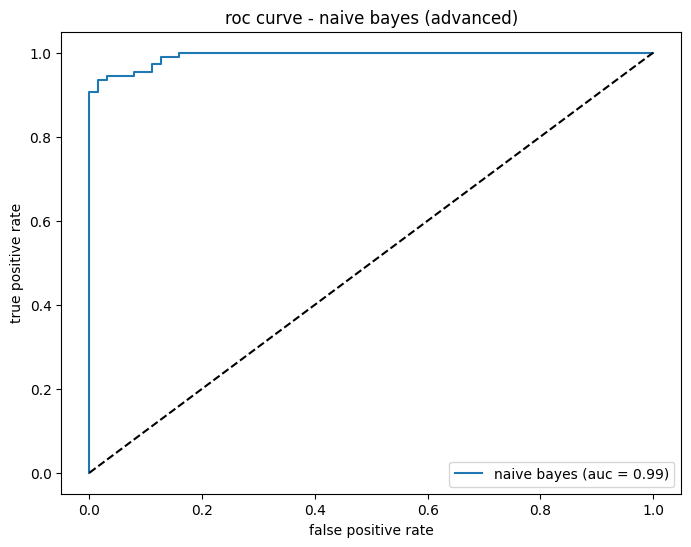

In [37]:

fpr, tpr, _ = roc_curve(y_test, y_prob)
plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, label='naive bayes (auc = %.2f)' % roc_auc_score(y_test, y_prob))
plt.plot([0, 1], [0, 1], 'k--')
plt.title("roc curve - naive bayes (advanced)")
plt.xlabel("false positive rate")
plt.ylabel("true positive rate")
plt.legend()
plt.show()


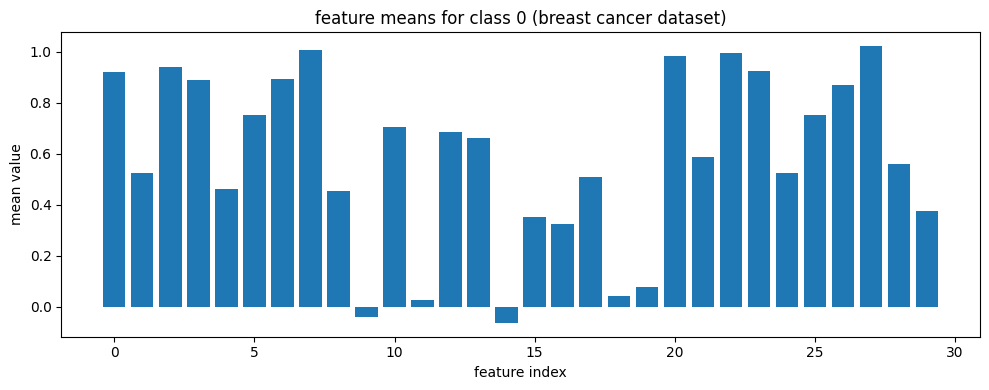

In [38]:

means = best_model.named_steps['nb'].theta_[0]
plt.figure(figsize=(10,4))
plt.bar(range(len(means)), means)
plt.title("feature means for class 0 (breast cancer dataset)")
plt.xlabel("feature index")
plt.ylabel("mean value")
plt.tight_layout()
plt.show()